In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from csv import writer
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as ticker
from sklearn.utils import shuffle

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [3]:
train_X = pd.read_csv('DataSet/trainX.csv', header=None)
train_Y = pd.read_csv('DataSet/trainY.csv', header=None)


trainY = train_Y.to_numpy()
trainX = train_X.to_numpy()


print(trainX.shape)
trainX = np.expand_dims(trainX,axis=2)

(1680, 6000)


In [4]:
minimum = np.amin(trainX)
maximum = np.amax(trainX)

trainX = (trainX-minimum)/(maximum-minimum)

trainX_tensor =  tf.convert_to_tensor(trainX)
output = tf.nn.max_pool1d(trainX_tensor, 2, 2, padding='VALID')

In [5]:
output.shape

TensorShape([1680, 3000, 1])

In [8]:
numberOfWebsites = 14
def my_model_sddec():

    input_1 = keras.Input(shape = (3000,1))

    conv1d_1 = layers.Conv1D(256,16,strides=3,padding='valid',activation='relu',use_bias=True)(input_1)#possibly update kernel_initializer
    max_pooling1d_1 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_1)

    conv1d_2 = layers.Conv1D(128,8,strides=3,padding='valid',activation='relu',use_bias=True)(max_pooling1d_1)#possibly update kernel_initializer
    max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_2)

    conv1d_3 = layers.Conv1D(32,8,strides=3,padding='same',activation='relu',use_bias=True)(max_pooling1d_2)#possibly update kernel_initializer
    max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_3)

    # conv1d_1 = layers.Conv1D(256,16,strides=3,padding='valid',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(input_1)#possibly update kernel_initializer
    
    # max_pooling1d_1 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_1)
    
    # conv1d_2 = layers.Conv1D(32,8,strides=3,padding='same',activation='relu',use_bias=True,kernel_initializer='VarianceScaling',bias_initializer = 'Zeros')(max_pooling1d_1)#possibly update kernel_initializer

    # max_pooling1d_2 = layers.MaxPooling1D(pool_size = 4,strides = 4, padding = 'same')(conv1d_2)

    #lstm_1 = layers.LSTM(32,activation='tanh',recurrent_activation='hard_sigmoid',use_bias=True,kernel_initializer='VarianceScaling',recurrent_initializer = 'orthogonal',bias_initializer='Zeros', return_sequences = True)(max_pooling1d_2) #Variance Scaling

    flatten_1 = layers.Flatten()(max_pooling1d_2)
    
    #x = layers.Dense(200,activation = 'softmax')(flatten_1)

    #dropout_1 = layers.Dropout(0.3)(flatten_1)

    #dense_1 = layers.Dense(300,activation = 'relu')(dropout_1)

    #dropout_2 = layers.Dropout(0.5)(x)

    dense_2= layers.Dense(numberOfWebsites, kernel_regularizer = 'l2',activation = 'softmax')(flatten_1)

    model = keras.Model(inputs = input_1, outputs = dense_2)
    return model

In [9]:

model = my_model_sddec()

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3000, 1)]         0         
                                                                 
 conv1d_3 (Conv1D)           (None, 995, 256)          4352      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 249, 256)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 81, 128)           262272    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 21, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 7, 32)             3280

In [10]:
model.compile(
	loss=keras.losses.SparseCategoricalCrossentropy(),
	optimizer=keras.optimizers.Adam(),
	metrics=["accuracy"]
)


#output, trainY = shuffle(output,trainY, random_state=0)
print(output.shape)

history = model.fit(output, trainY,validation_split = 0.3, batch_size=32, epochs=25, verbose=1)

(1680, 3000, 1)
Epoch 1/25
37/37 [==============================] - 3s 12ms/step - loss: 2.5222 - accuracy: 0.1752 - val_loss: 2.2086 - val_accuracy: 0.3155
Epoch 2/25
37/37 [==============================] - 0s 7ms/step - loss: 1.7048 - accuracy: 0.4770 - val_loss: 1.8615 - val_accuracy: 0.5298
Epoch 3/25
37/37 [==============================] - 0s 7ms/step - loss: 1.1484 - accuracy: 0.7432 - val_loss: 1.4488 - val_accuracy: 0.7143
Epoch 4/25
37/37 [==============================] - 0s 6ms/step - loss: 0.8483 - accuracy: 0.7857 - val_loss: 1.2237 - val_accuracy: 0.7421
Epoch 5/25
37/37 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.8759 - val_loss: 1.1596 - val_accuracy: 0.7857
Epoch 6/25
37/37 [==============================] - 0s 6ms/step - loss: 0.5384 - accuracy: 0.8810 - val_loss: 1.1885 - val_accuracy: 0.7897
Epoch 7/25
37/37 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.9056 - val_loss: 0.8813 - val_accuracy: 0.8929
Epo

In [10]:
model.save('TrainedModel/trainedModel.h5',save_format='h5')

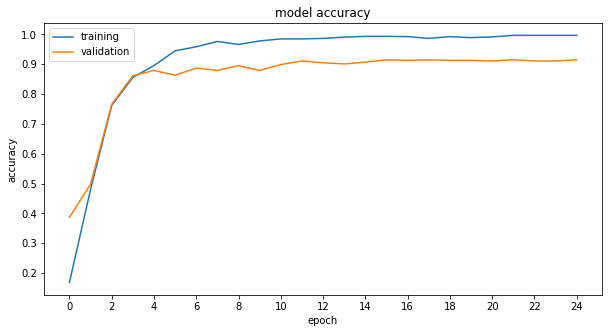

In [11]:

fig = plt.figure(figsize=(10,5))


#plotting

plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
fig.savefig('plot.png',dpi=200)

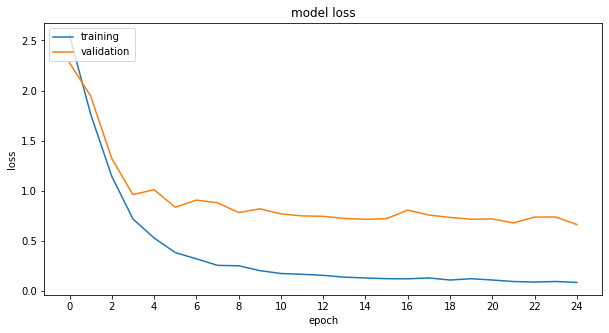

In [12]:

fig = plt.figure(figsize=(10,5))


#plotting

plt.locator_params(axis="x", nbins=20)
plt.locator_params(axis="y", nbins=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
fig.savefig('plot.png',dpi=200)